In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
result = pd.read_excel("/Users/zhangyujie/Desktop/NanoBio_main_folder/results/excel_data/Well_D_17_100hz_3point5s Mex Control_data.xlsx", header = 1)

In [3]:
data = [i for i in result.columns if "pixel_value" in i]

In [4]:
def filterExtreme(l, v):
    result = []
    for i in l:
        if i != v:
            result.append(i)
    return result

In [9]:
temp = np.array([1,2,3])
temp.mean()

2.0

In [5]:
def standardize(data):
    npd = np.array(data)
    mean = npd.mean()
    std = npd.std()
    result = [(i - mean) / std for i in data]
    return result

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

/Users/zhangyujie/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


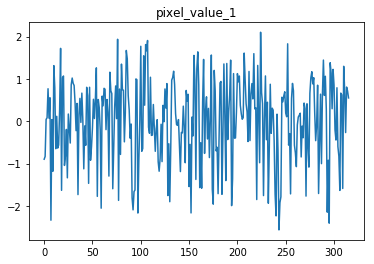

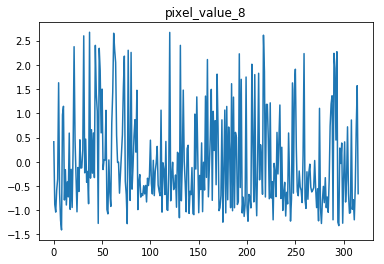

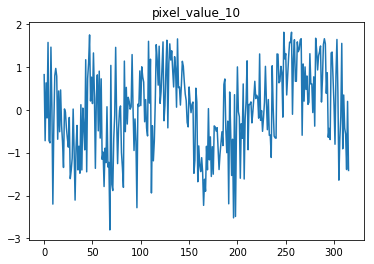

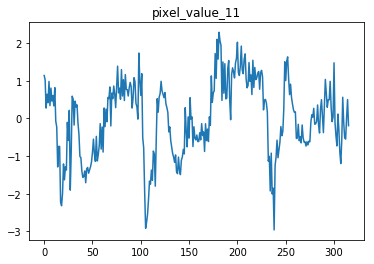

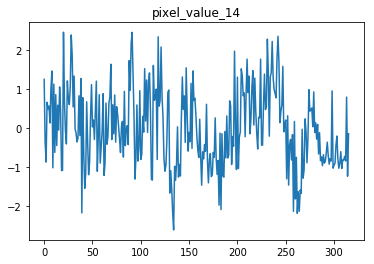

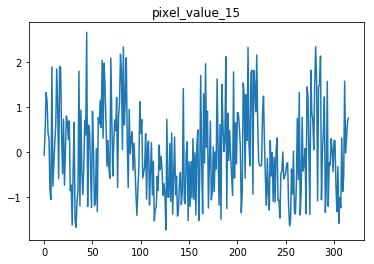

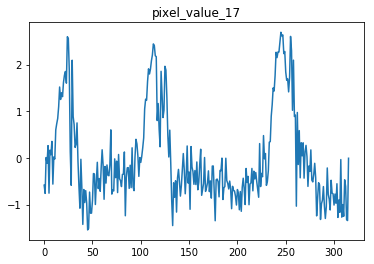

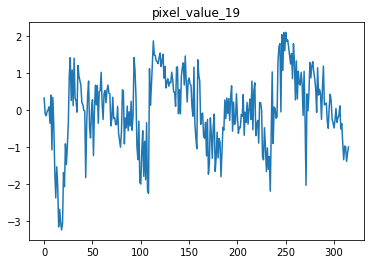

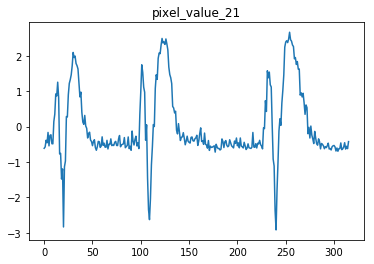

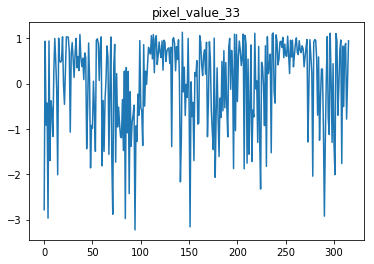

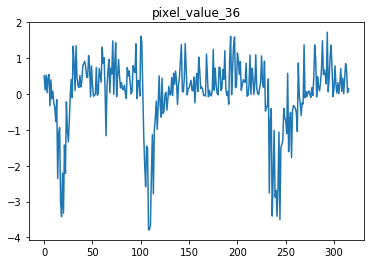

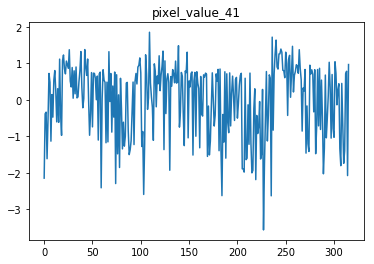

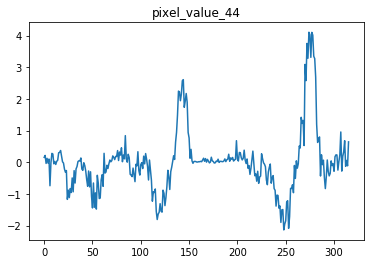

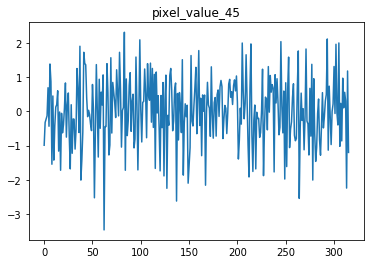

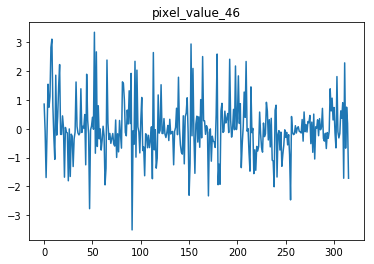

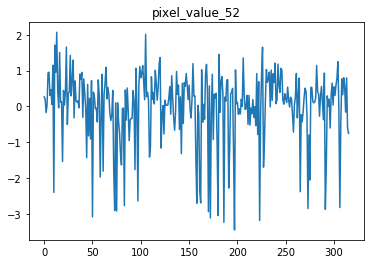

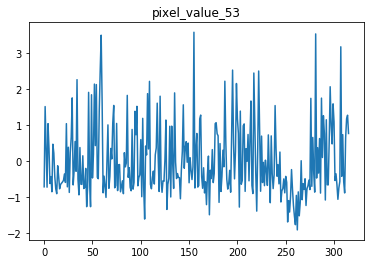

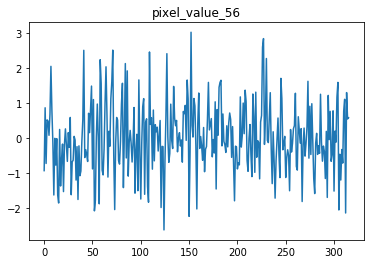

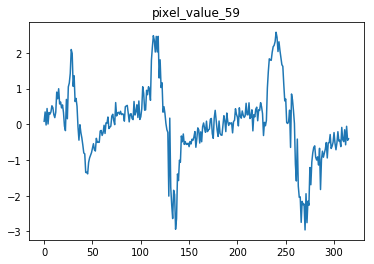

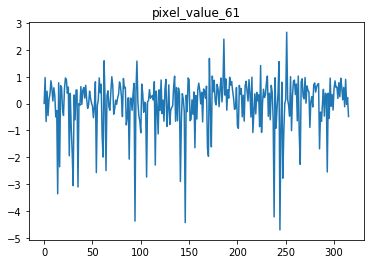

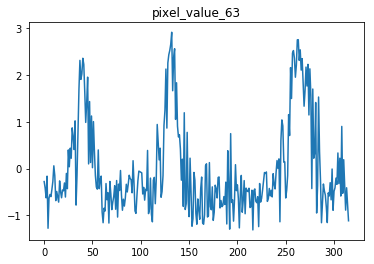

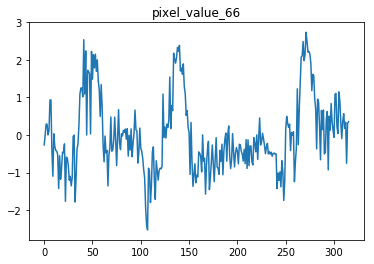

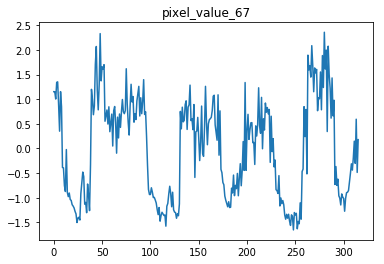

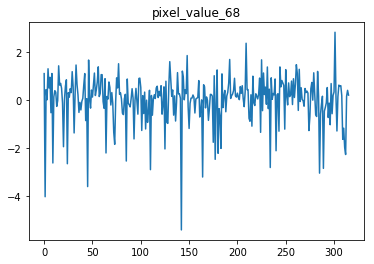

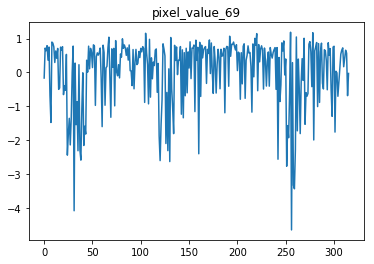

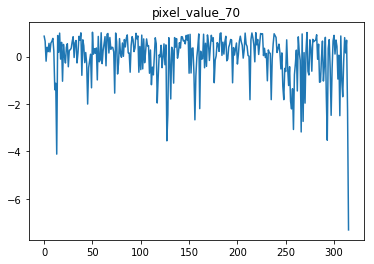

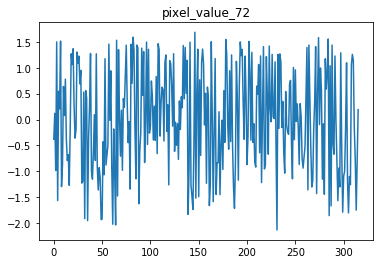

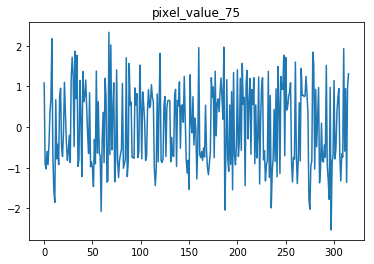

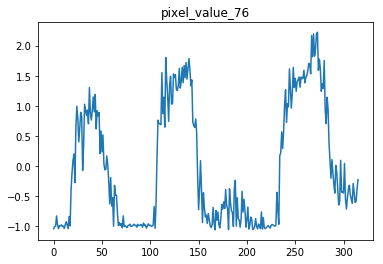

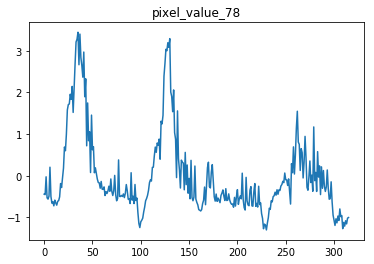

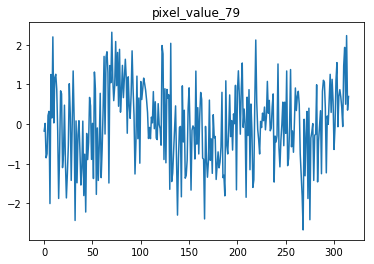

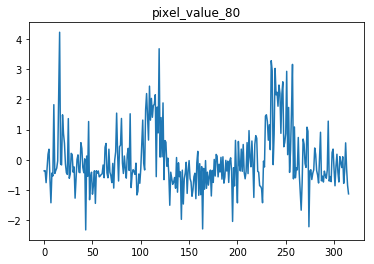

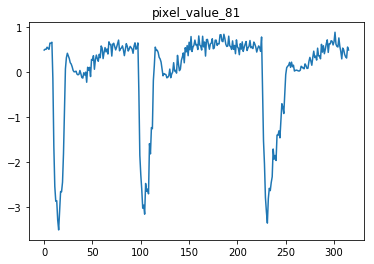

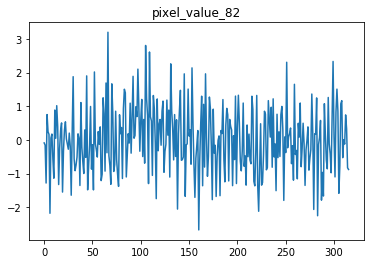

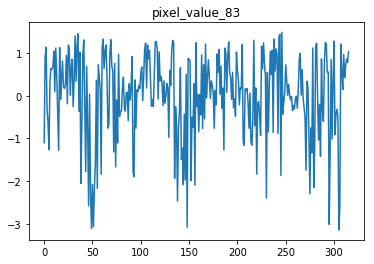

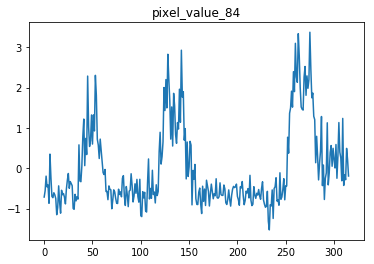

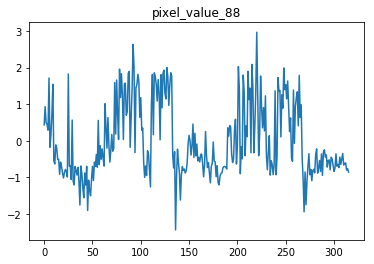

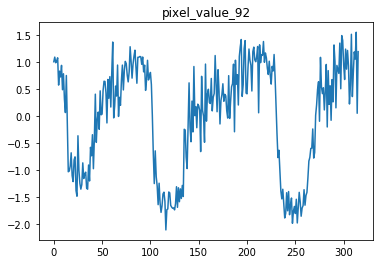

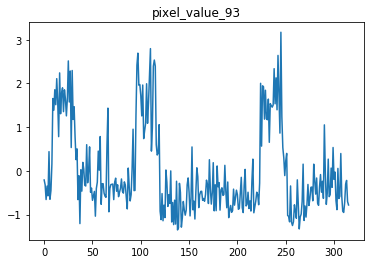

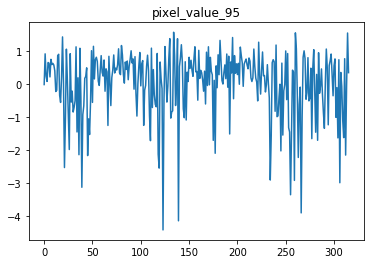

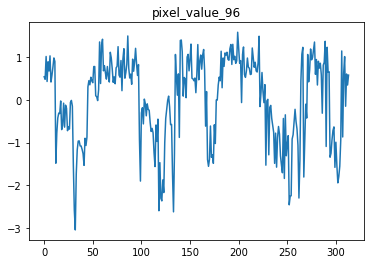

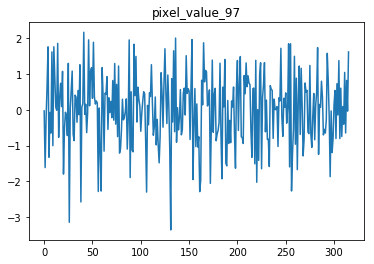

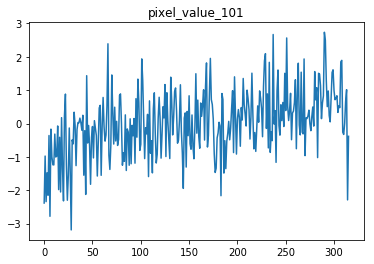

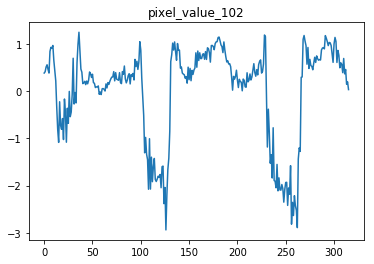

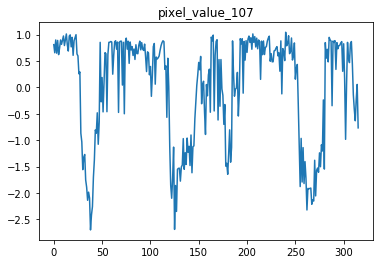

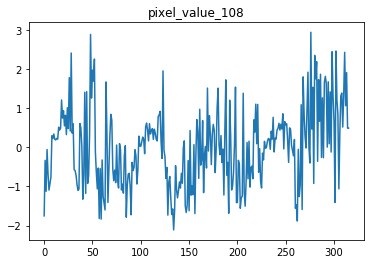

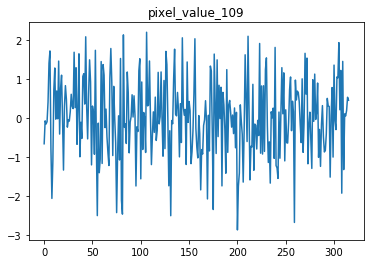

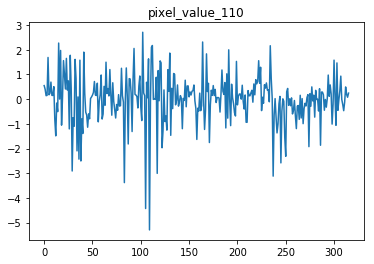

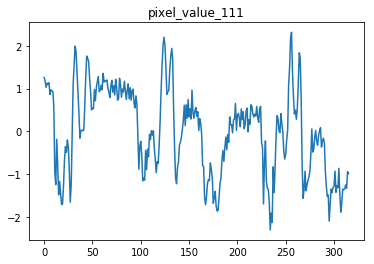

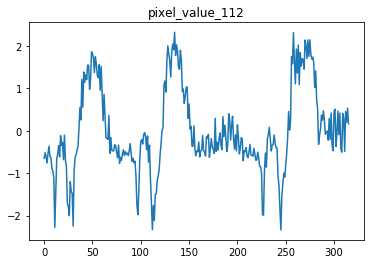

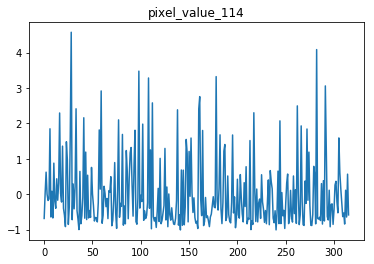

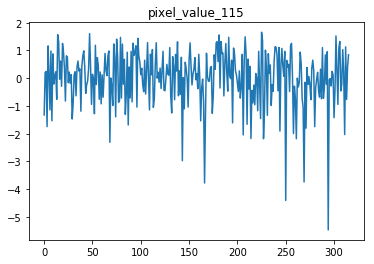

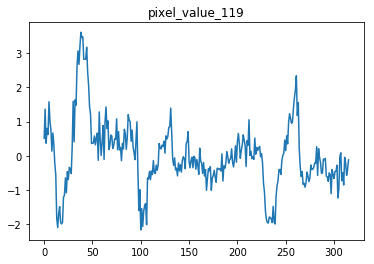

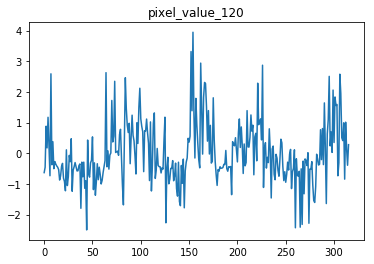

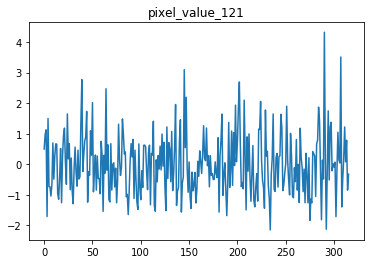

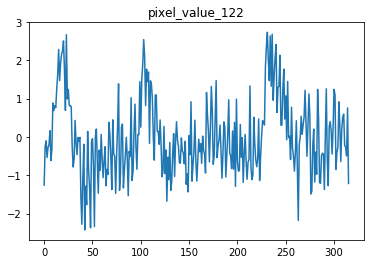

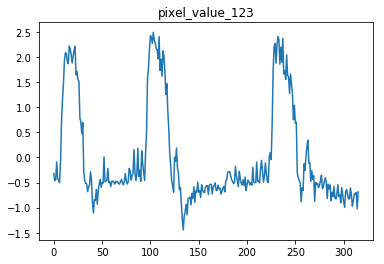

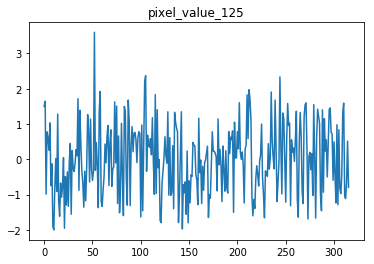

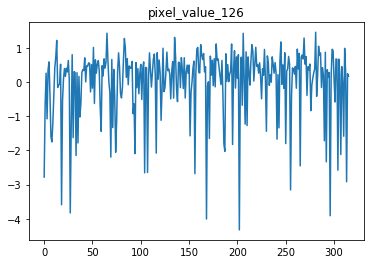

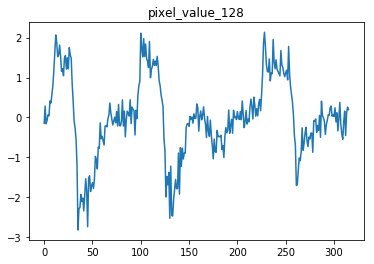

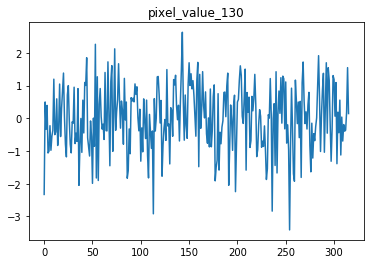

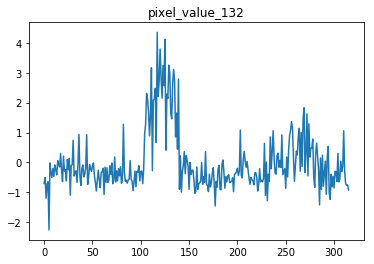

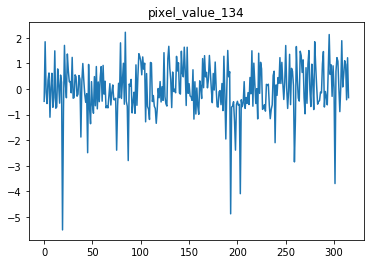

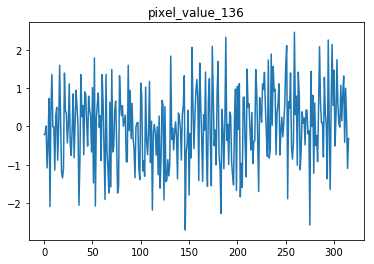

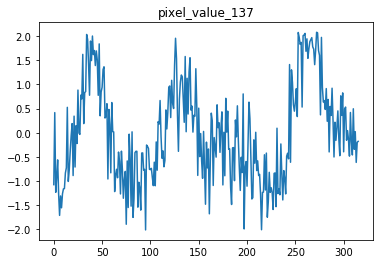

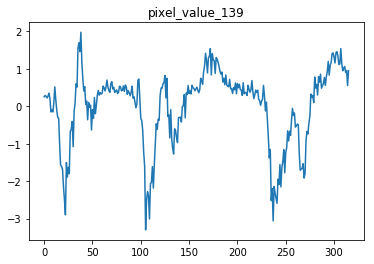

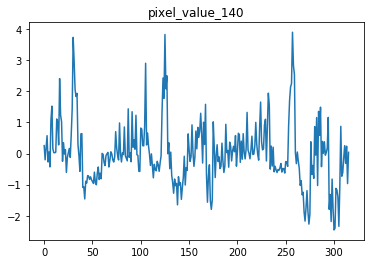

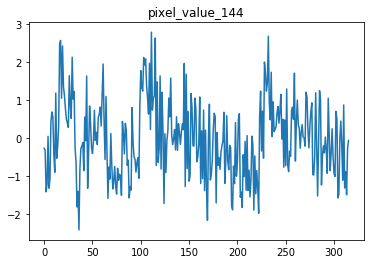

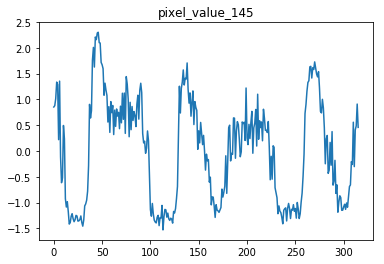

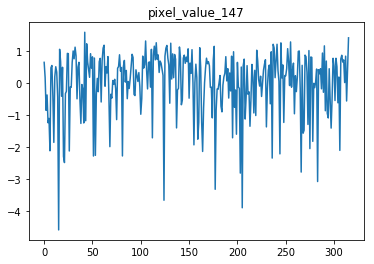

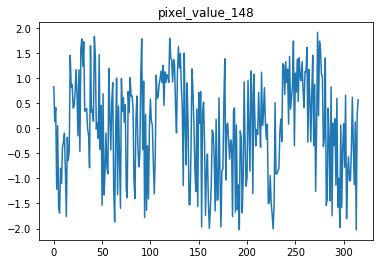

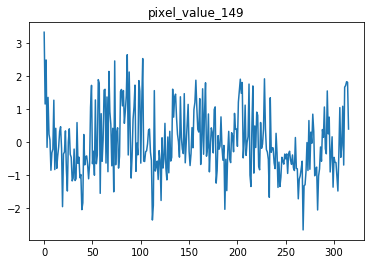

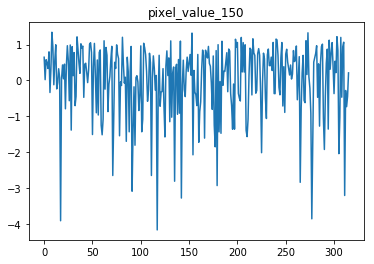

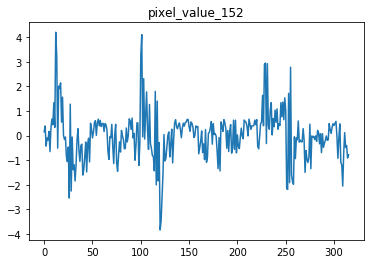

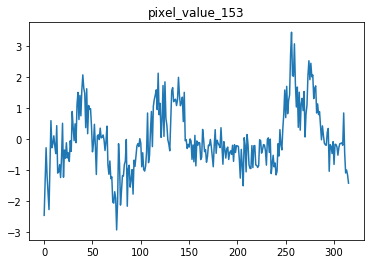

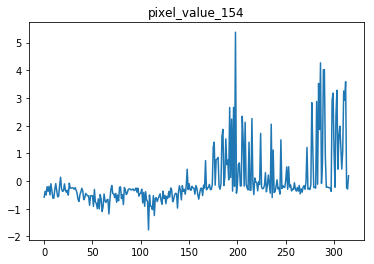

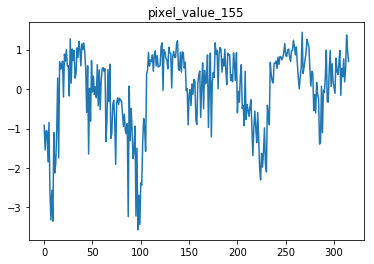

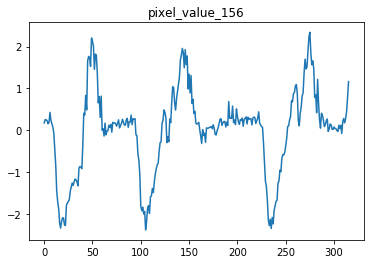

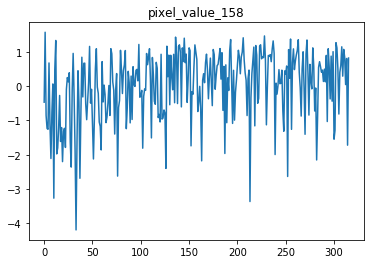

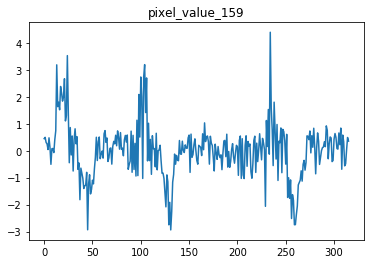

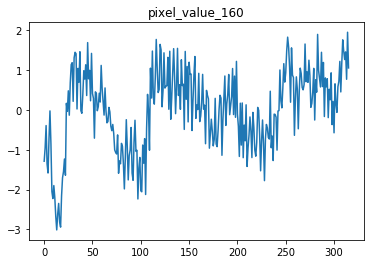

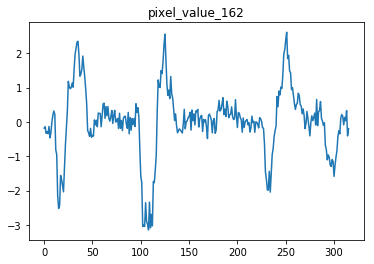

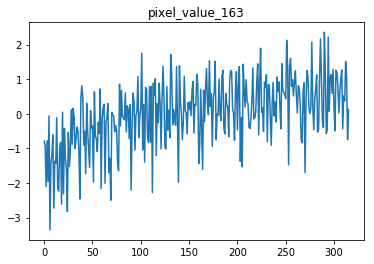

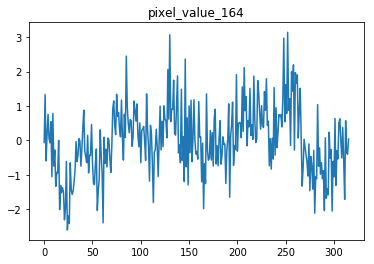

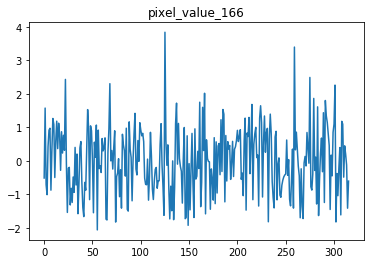

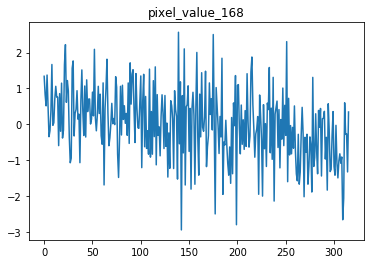

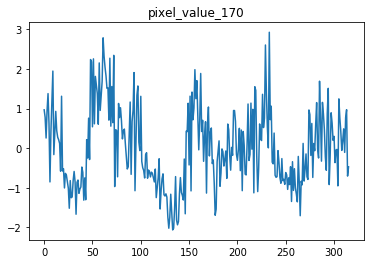

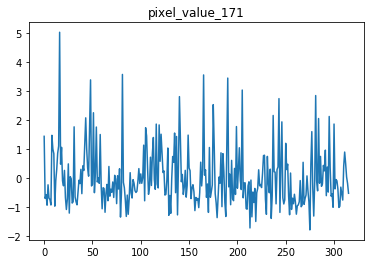

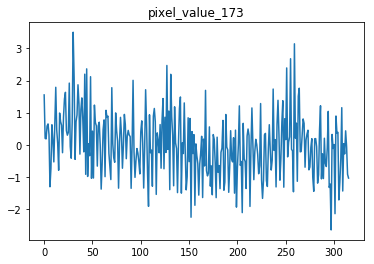

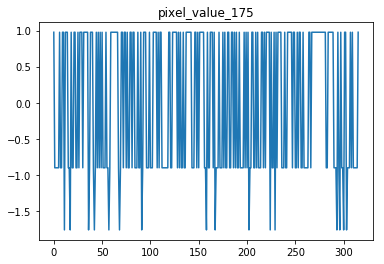

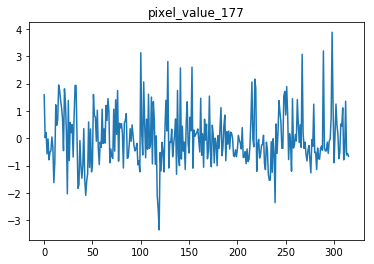

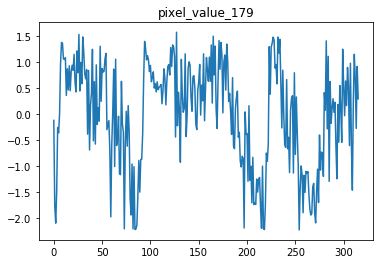

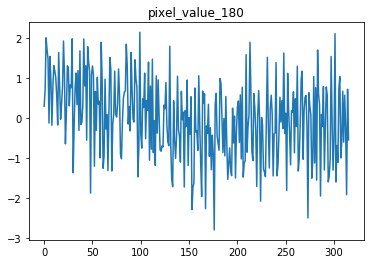

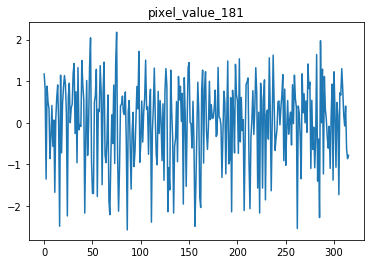

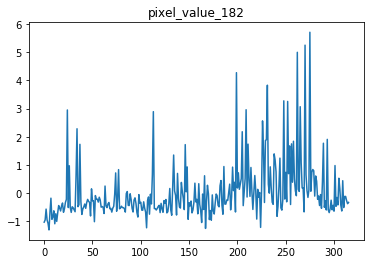

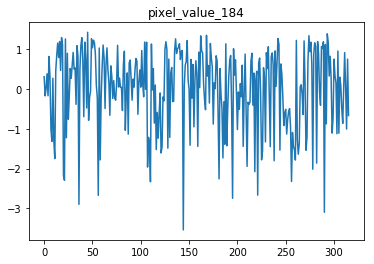

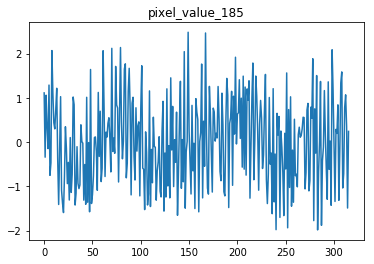

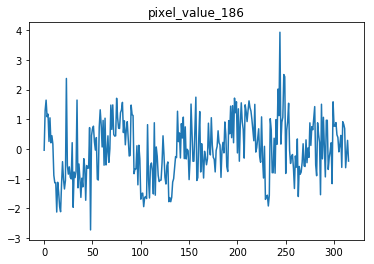

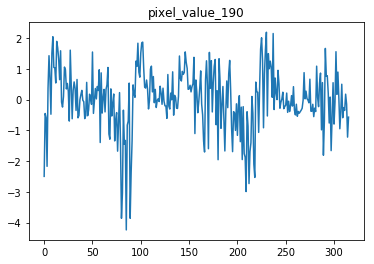

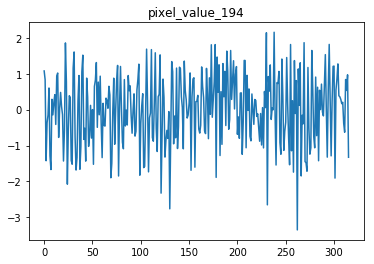

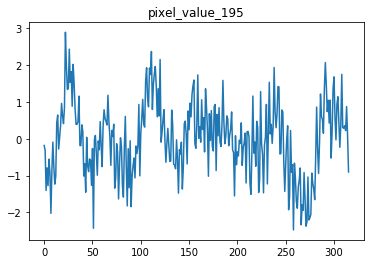

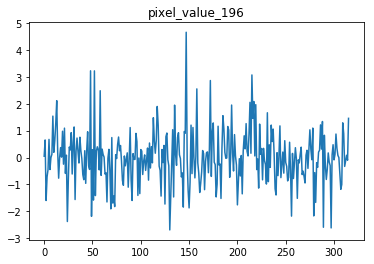

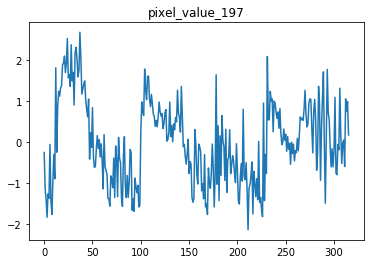

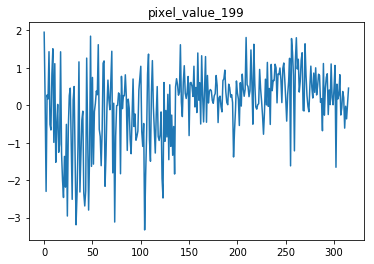

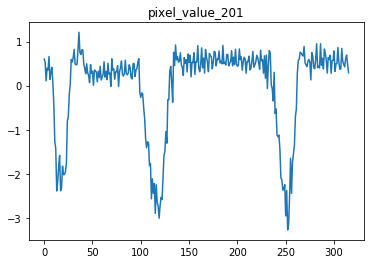

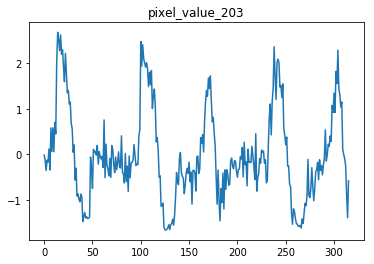

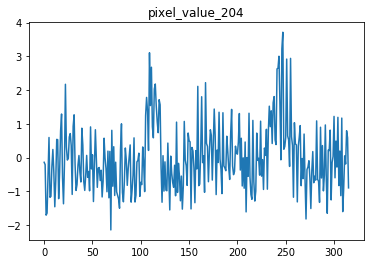

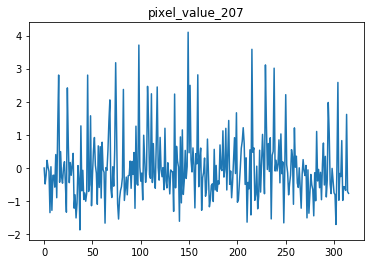

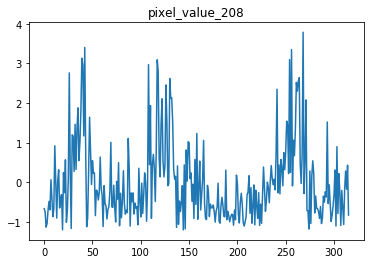

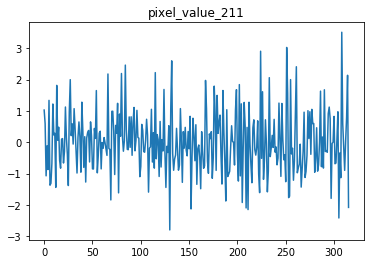

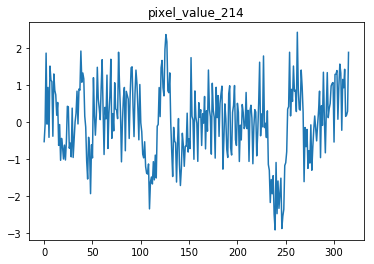

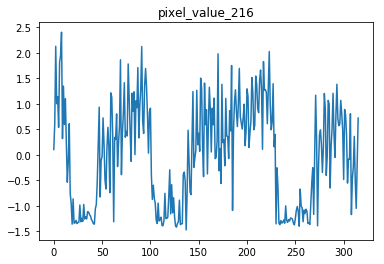

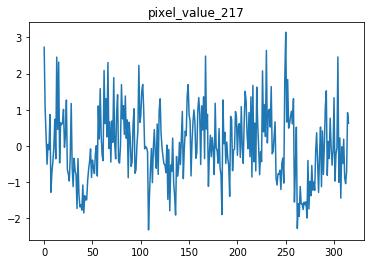

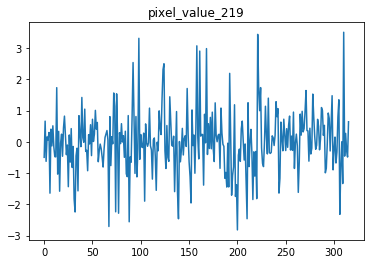

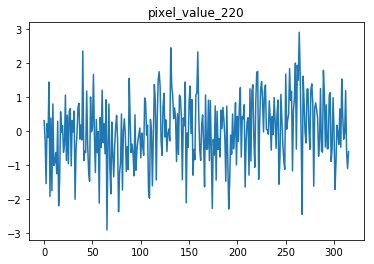

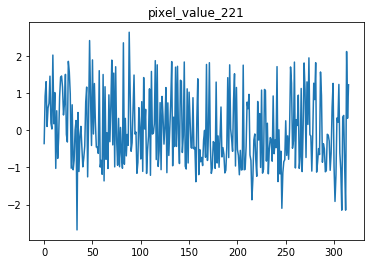

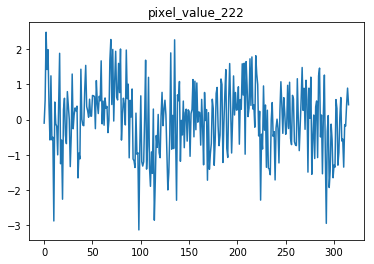

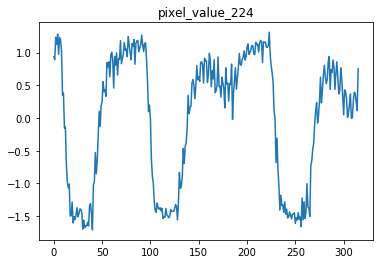

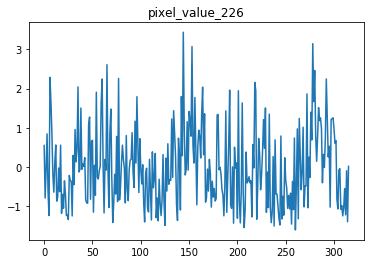

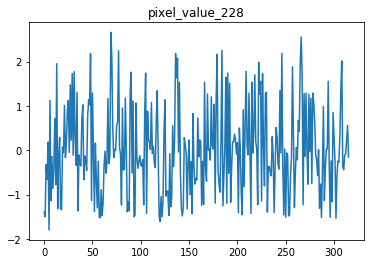

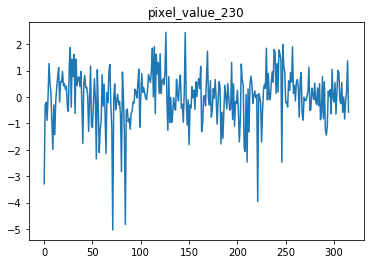

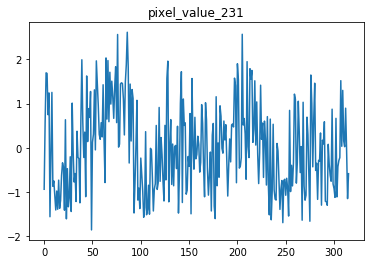

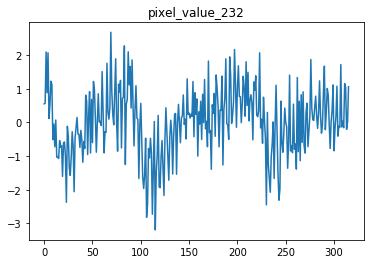

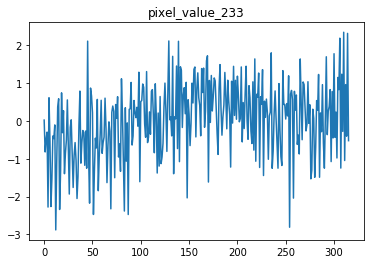

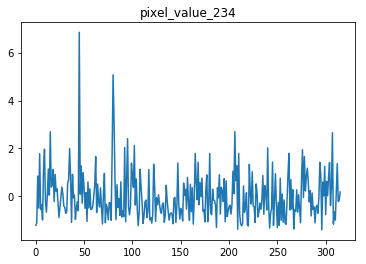

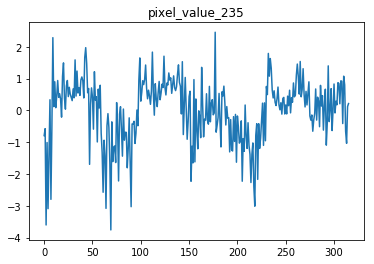

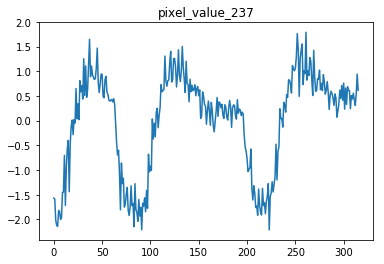

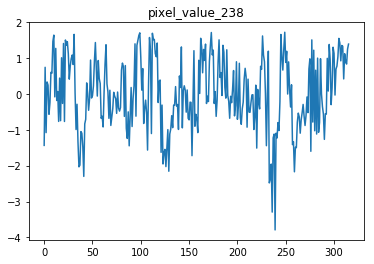

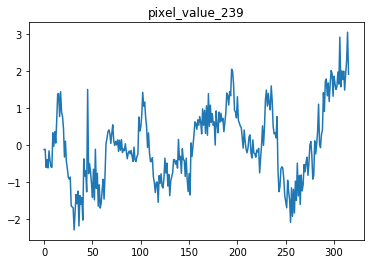

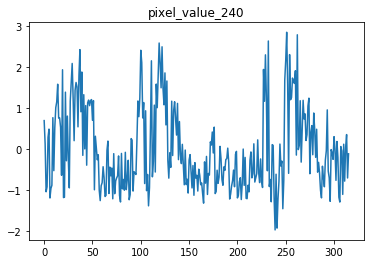

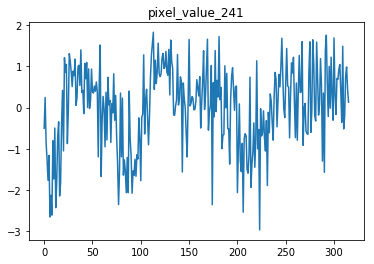

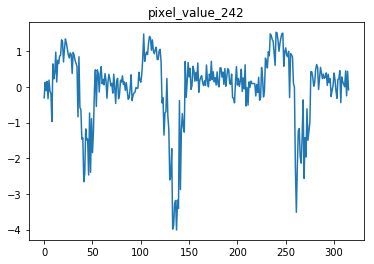

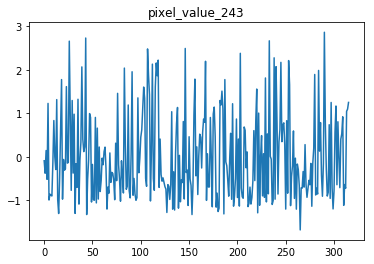

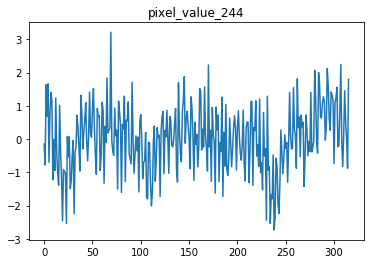

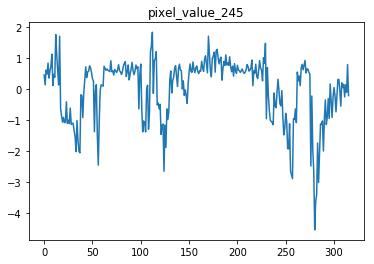

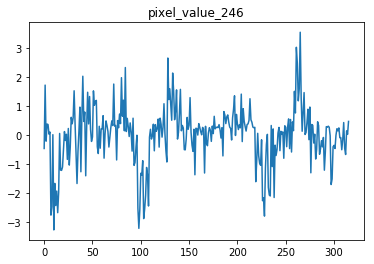

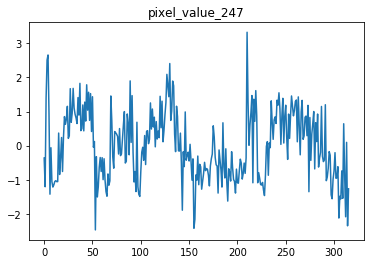

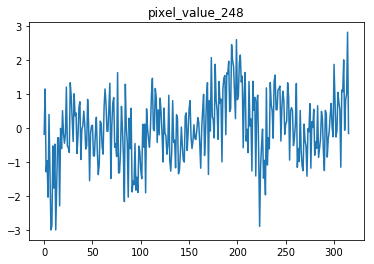

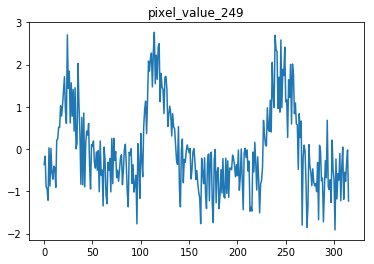

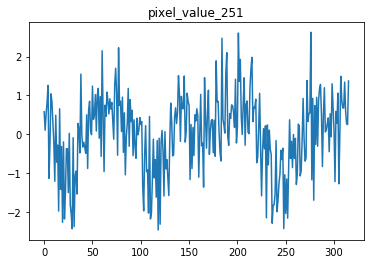

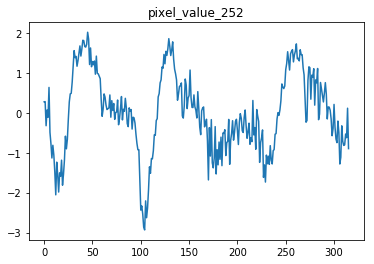

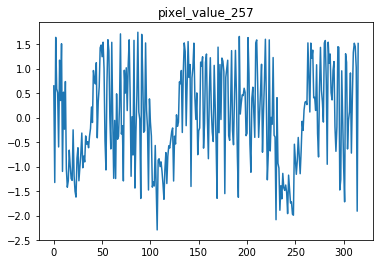

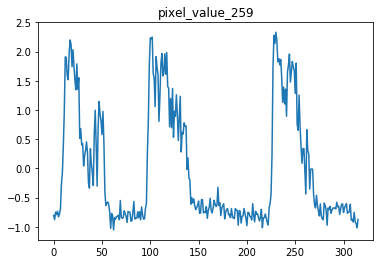

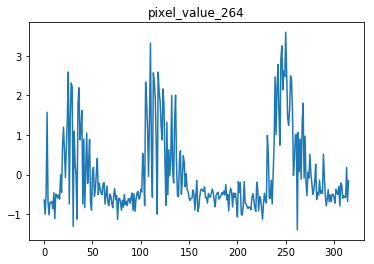

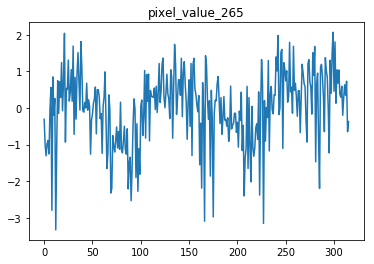

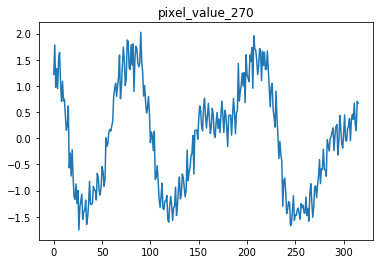

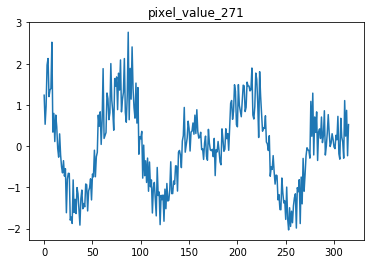

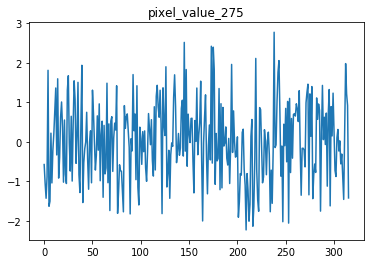

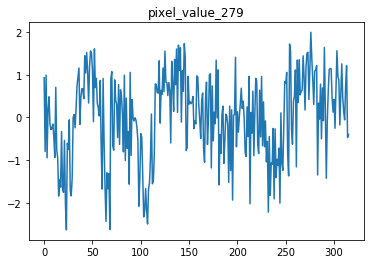

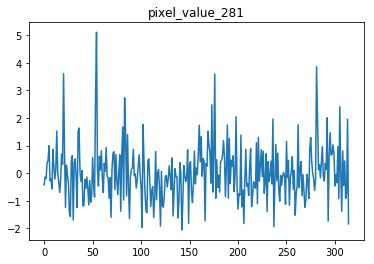

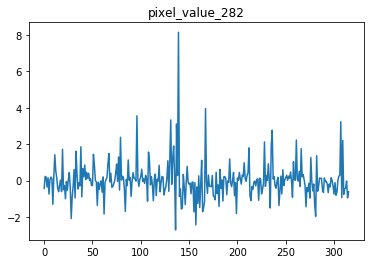

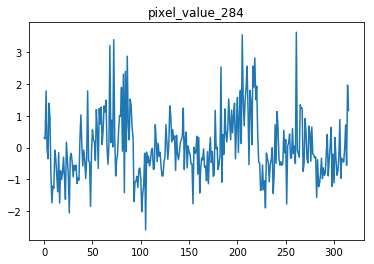

In [ ]:
for d in data:
    plt.figure()
    process = smooth(standardize(filterExtreme(result[d], 0)), 1)
#     plt.plot(filterExtreme(result[d], 0))
    plt.plot(process)
    plt.title(d)

In [6]:
# Input standardized data and output True if observed # spikes are detected
def spike_filter(data, spike_num, persistance, shortest_gap, exact):
    count = 0
    temp_c = 0
    escape = False
    start = -1
    for i in range(len(data)):
        if data[i] > 1 and not escape:
            temp_c += 1
        else:
            temp_c = 0
        if start != -1 and (i - start) >= shortest_gap:
            escape = False
            start = -1
        if temp_c >= persistance and not escape:
            count += 1
            escape = True
            temp_c = 0
        if escape and start == -1 and data[i] < 1:
            start = i
    if exact:
        if spike_num == count:
            return True
    else:
        if spike_num <= count:
            return True
    return False

In [26]:
temp = [0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0]
# spike_filter(temp, 2, 2, 1)
tt = standardize(filterExtreme(result["pixel_value_297"], 0))
spike_filter(tt, 2, 5, 20, False)

True

In [9]:
data

['pixel_value_0',
 'pixel_value_8',
 'pixel_value_9',
 'pixel_value_10',
 'pixel_value_11',
 'pixel_value_13',
 'pixel_value_14',
 'pixel_value_15',
 'pixel_value_19',
 'pixel_value_20',
 'pixel_value_21',
 'pixel_value_23',
 'pixel_value_25',
 'pixel_value_26',
 'pixel_value_27',
 'pixel_value_29',
 'pixel_value_30',
 'pixel_value_33',
 'pixel_value_35',
 'pixel_value_36',
 'pixel_value_37',
 'pixel_value_39',
 'pixel_value_40',
 'pixel_value_41',
 'pixel_value_43',
 'pixel_value_44',
 'pixel_value_47',
 'pixel_value_48',
 'pixel_value_50',
 'pixel_value_51',
 'pixel_value_52',
 'pixel_value_53',
 'pixel_value_54',
 'pixel_value_55',
 'pixel_value_56',
 'pixel_value_59',
 'pixel_value_60',
 'pixel_value_62',
 'pixel_value_64',
 'pixel_value_65',
 'pixel_value_66',
 'pixel_value_67',
 'pixel_value_68',
 'pixel_value_69',
 'pixel_value_70',
 'pixel_value_71',
 'pixel_value_72',
 'pixel_value_73',
 'pixel_value_76',
 'pixel_value_77',
 'pixel_value_78',
 'pixel_value_79',
 'pixel_value_8

/Users/zhangyujie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


55


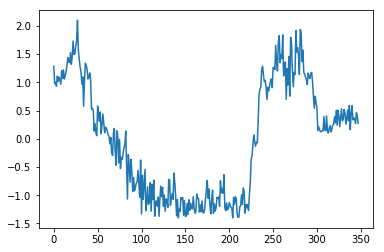

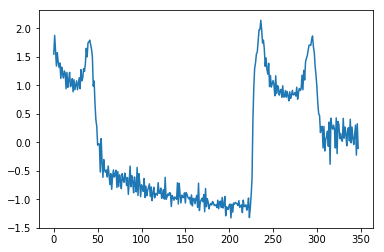

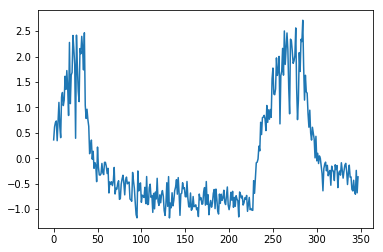

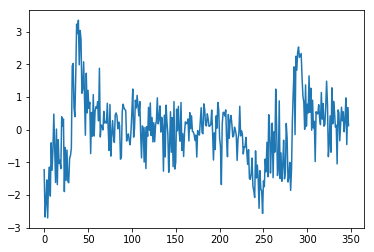

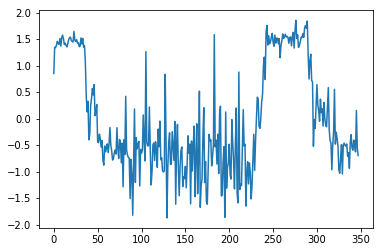

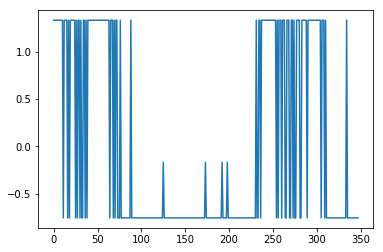

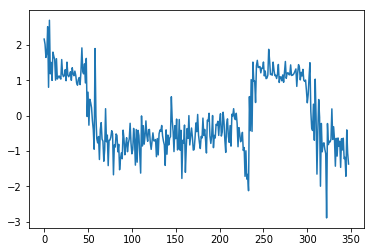

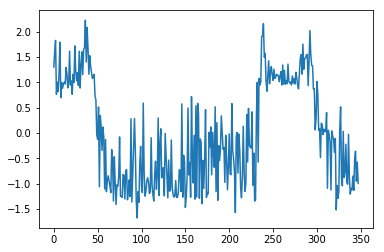

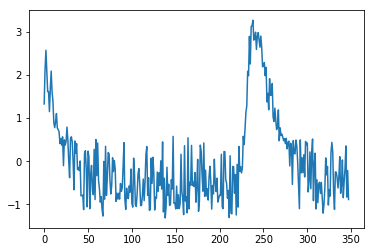

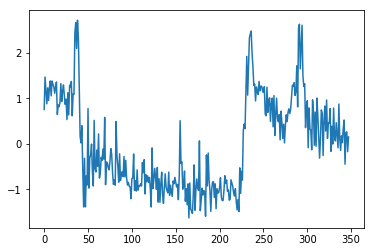

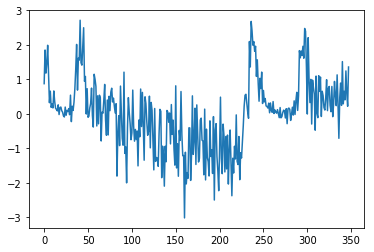

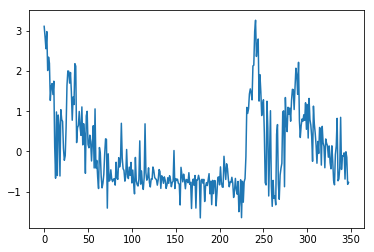

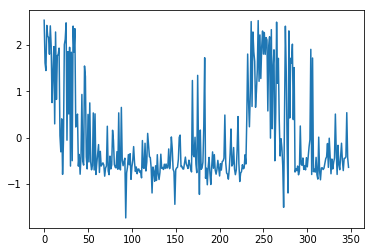

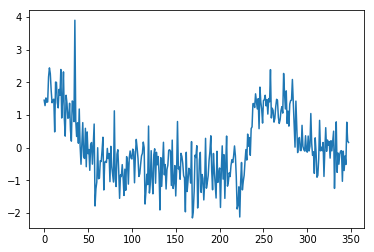

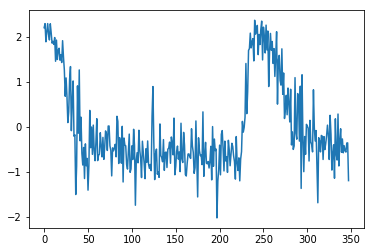

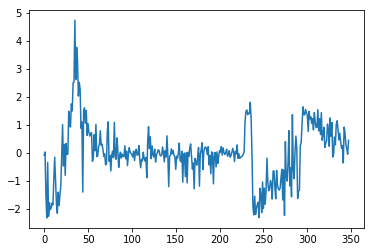

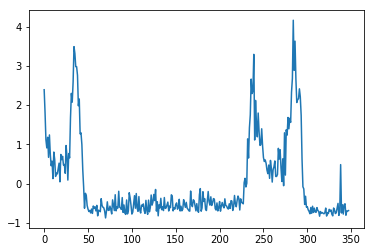

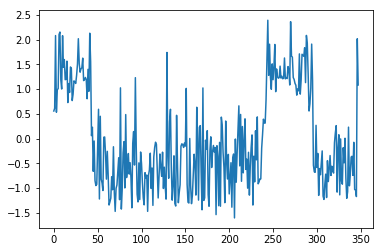

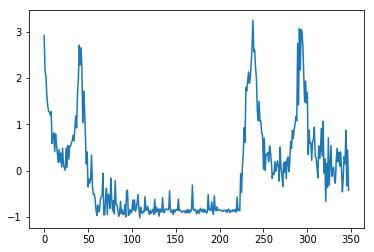

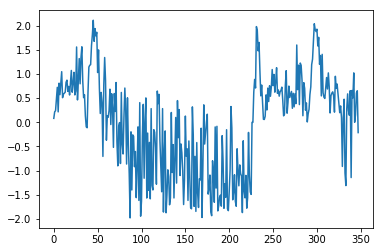

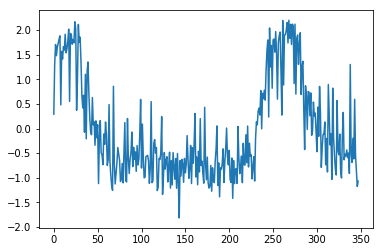

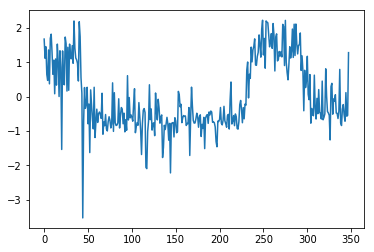

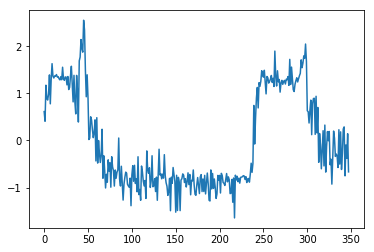

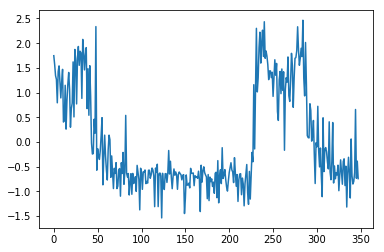

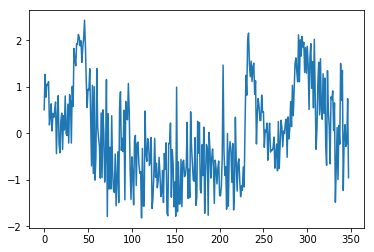

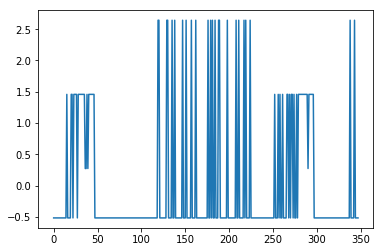

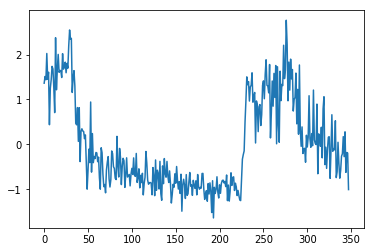

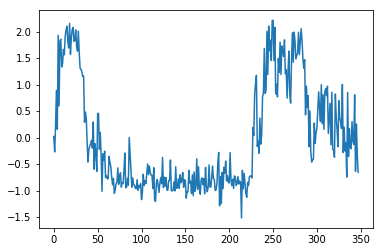

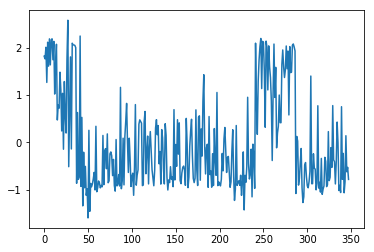

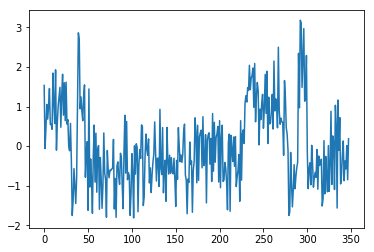

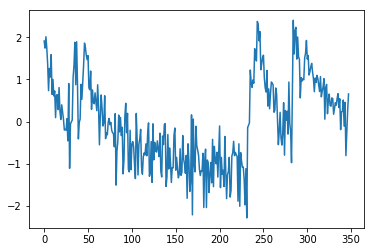

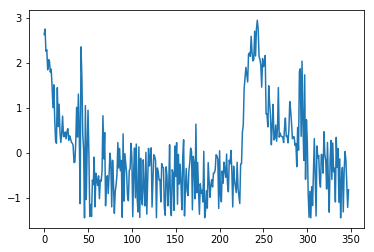

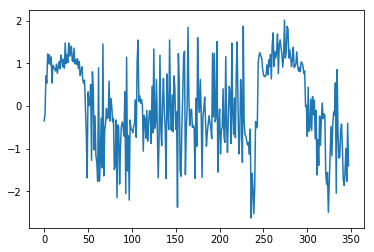

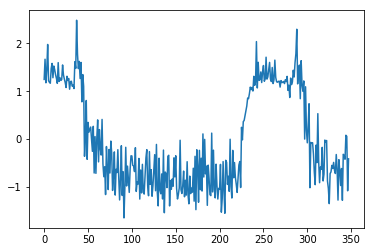

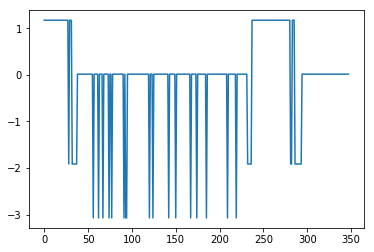

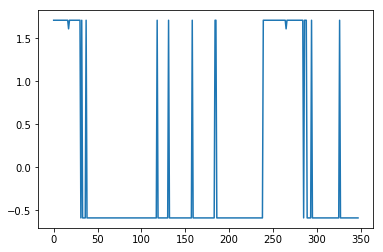

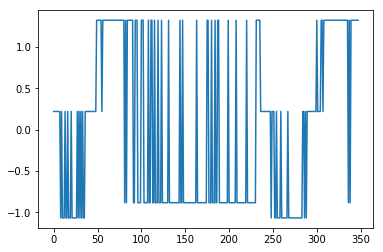

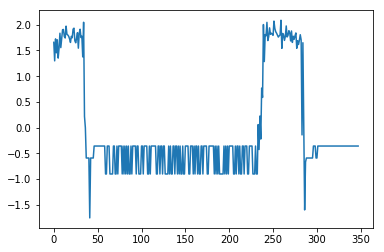

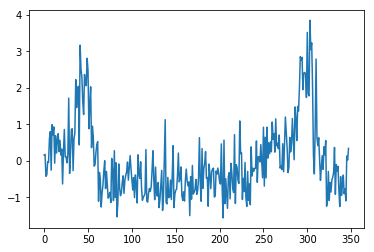

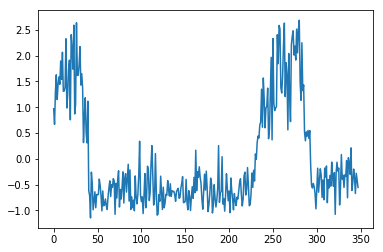

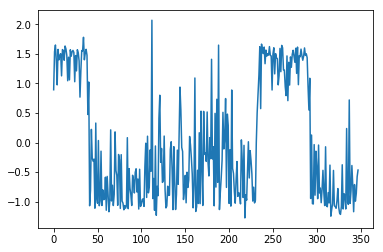

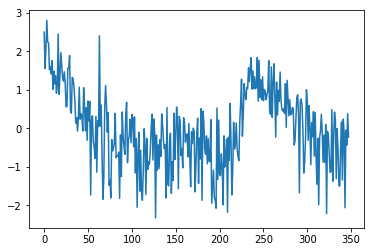

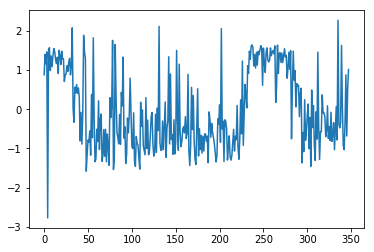

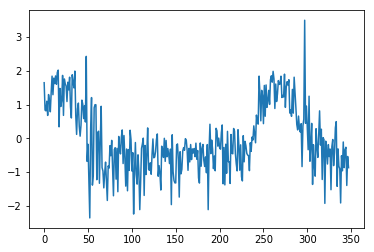

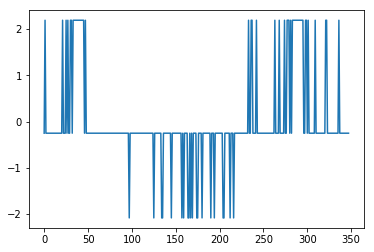

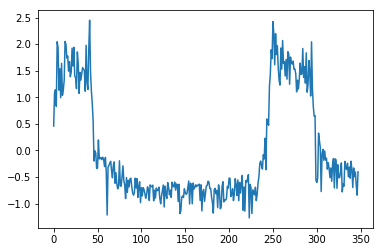

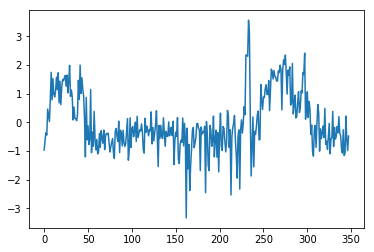

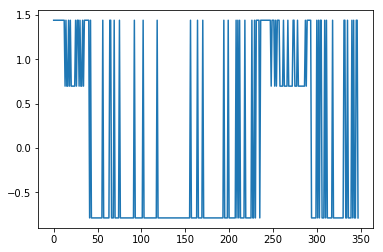

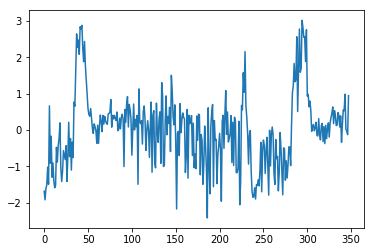

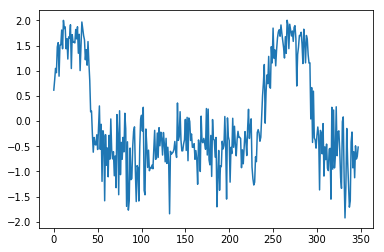

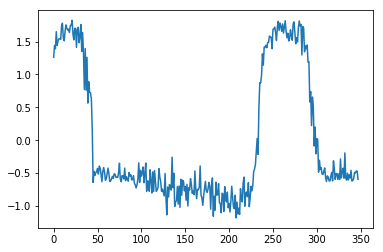

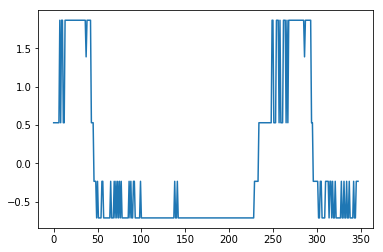

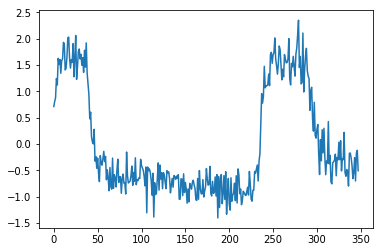

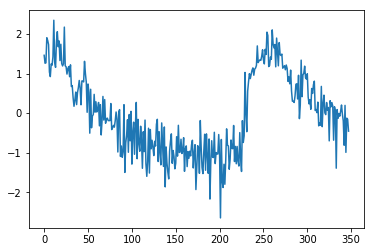

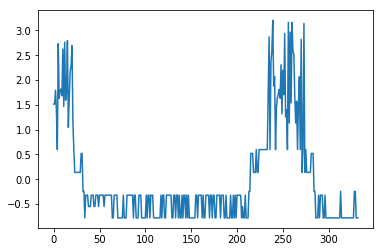

In [11]:
# How to get good data: input: 
# Input:
# spike time: 2
std_data = [standardize(filterExtreme(result[d], 0)) for d in data]
count = 0
j = 0
for sd in std_data:
    if spike_filter(sd, 2, 8, 20, False):
        name = data[j]
        count += 1
        fig = plt.figure()
        plt.plot(sd)
        fig.savefig("./Image_Result/" + name)
#         plt.title(d)
    j += 1
print(count)

In [43]:
std_data = [standardize(filterExtreme(result["pixel_value_0"], 0))]

92.42703735632185 1.0085412398670424


In [46]:
tt = [0, 2, 2, 0, 2]
spike_filter(tt, 1, 2, 1, False)

True

In [41]:
good_one_r1 = [28, 37, 47, 75, 87, 101, 110, 112, 118, 144, 158, 172, 179, 198, 218, 248, 257, 270, 314, 324, 
               336, 353, 363, 369, 370, 376, 381, 396, 411, 414, 423, 427, 431, 558]

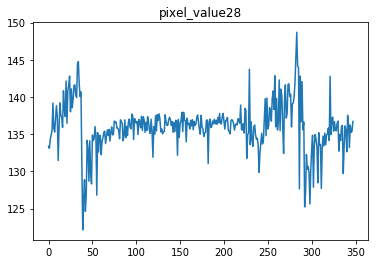

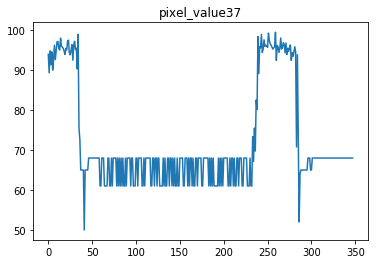

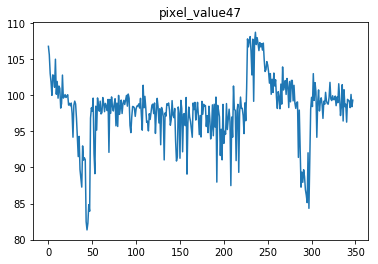

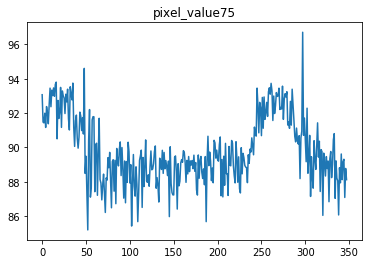

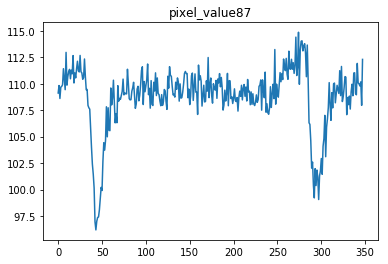

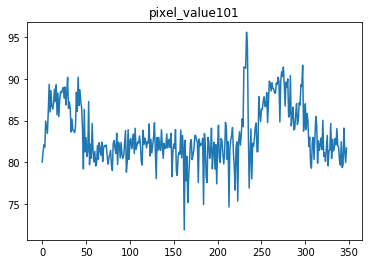

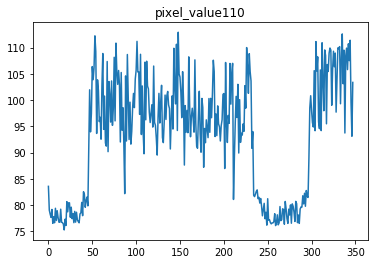

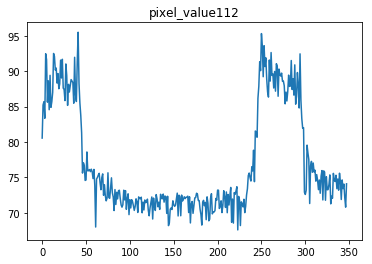

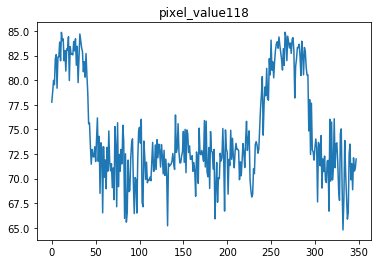

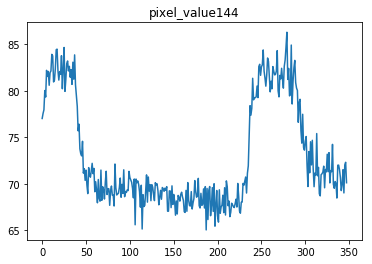

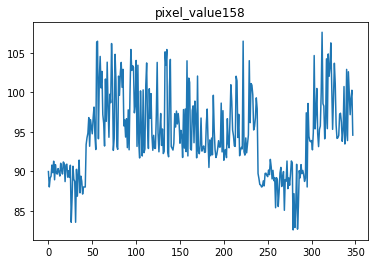

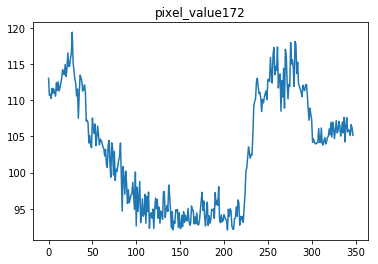

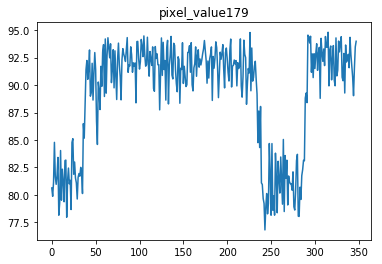

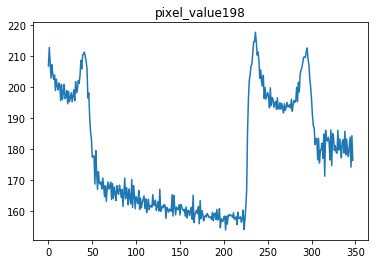

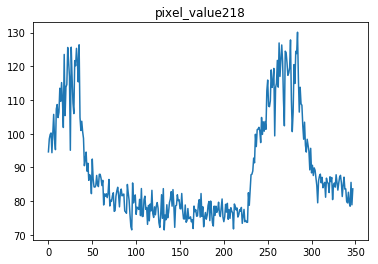

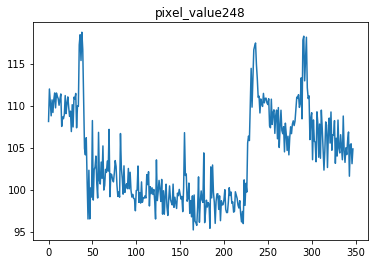

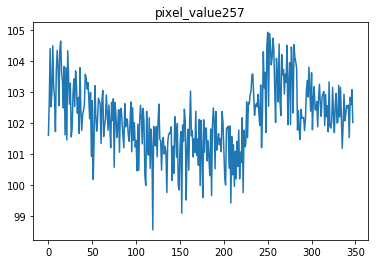

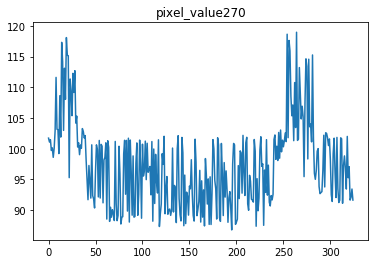

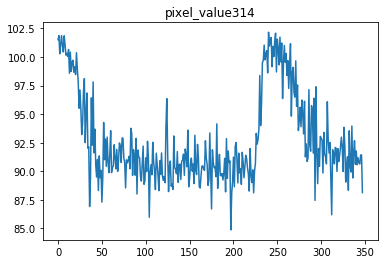

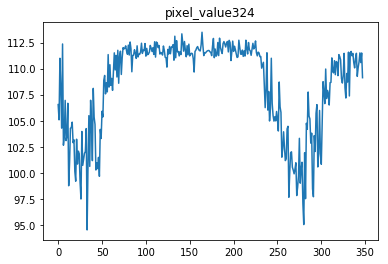

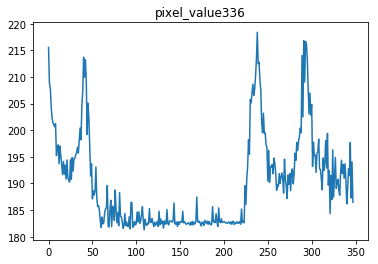

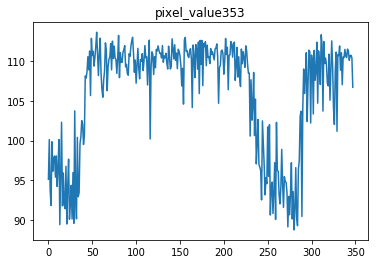

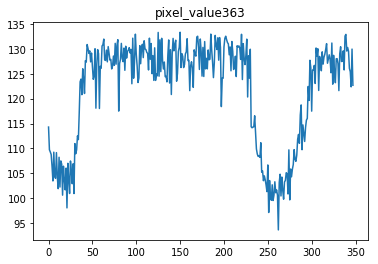

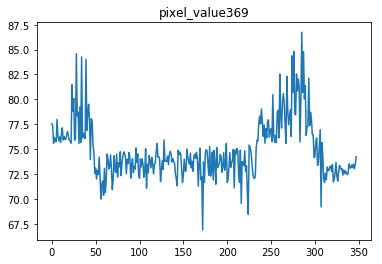

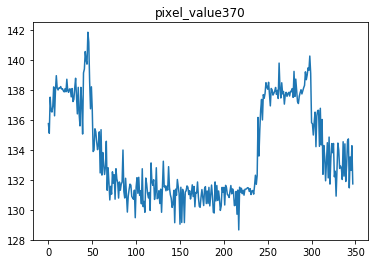

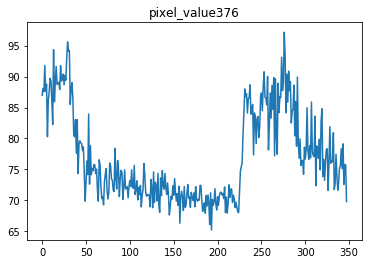

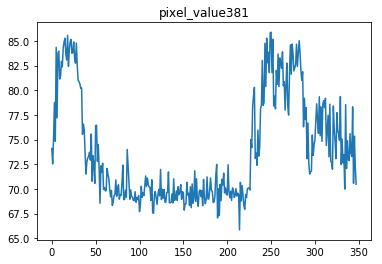

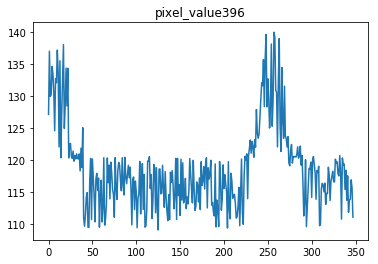

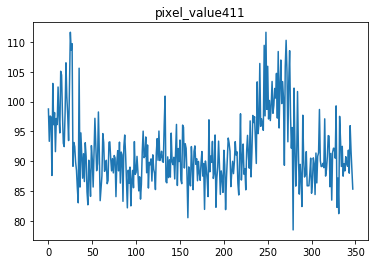

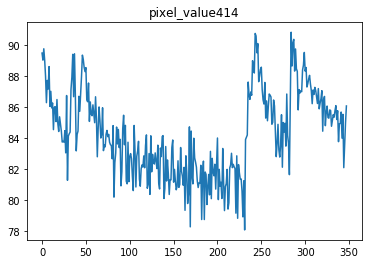

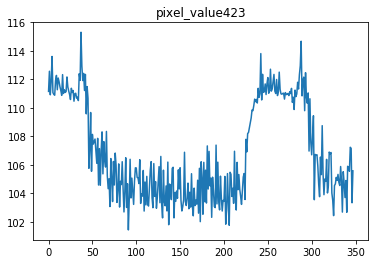

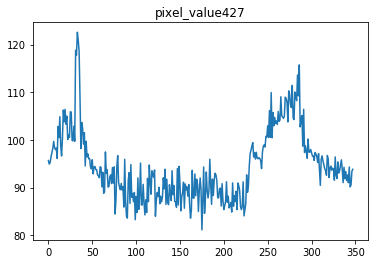

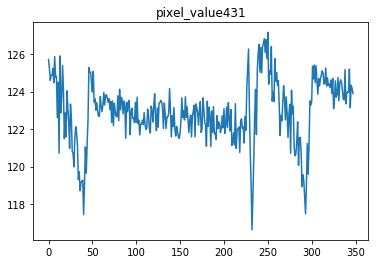

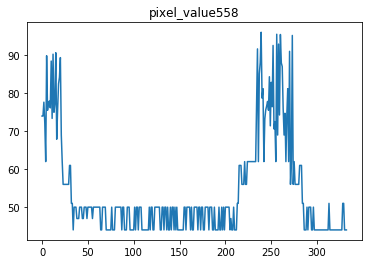

In [47]:
for d in data:
    for g in good_one_r1:
        if str(g) == d.split("value")[1]:
            fig = plt.figure()
            plt.plot(filterExtreme(result[d], 0))
            plt.title(d)
            fig.savefig("./Image_Result/" + d)

In [51]:
import re
re.findall(r'\d+', 'pixel_length345')

['345']

In [63]:
xs = []
ys = []
for i in result.columns:
    tt = re.findall(r'\d+', i)
    if tt:
        tt = tt[0]
    for g in good_one_r1:
        if str(g) == tt:
            if "Start X" in i:
                xs.append(result[i][0])
            if "Start Y" in i:
                ys.append(result[i][0]) 


[316.2415954104716,
 5.742359929187046,
 365.2194189365508,
 481.7342195602177,
 626.9573632907704,
 476.17630895406876,
 694.1010219906036,
 540.3253099106963,
 613.654119313104,
 303.51386329596625,
 287.55991391032865,
 299.81617752226776,
 344.0611830004349,
 619.0198052876964,
 521.9149775904596,
 489.64738643670313,
 501.6563384404408,
 599.6275259802401,
 467.7401576236054,
 333.6912663008306,
 377.0122478134293,
 524.6949071686558,
 480.1291010922428,
 741.4188061977218,
 599.0118649779748,
 191.00395653325342,
 280.49349106254664,
 450.1434389766035,
 253.64365480224023,
 178.15387168847232,
 364.9086992405433,
 283.27649661143784,
 600.1341397873326,
 0.0]

In [67]:
ys

[46.4208521367579,
 62.87802766688454,
 71.71905865127069,
 127.23464008372878,
 147.5126353498332,
 162.25108855656833,
 176.9579075996127,
 177.16970262823313,
 186.86308992292334,
 235.20914722903433,
 256.0232598641162,
 276.75770159477895,
 293.20318141975224,
 326.5906966466161,
 352.0871588600218,
 392.74974553452773,
 418.5176188334644,
 429.24208239831006,
 496.7700292747783,
 503.4277628509574,
 524.7887980717046,
 562.7024795321494,
 568.7168396536329,
 582.0585495487654,
 576.8826304478321,
 592.7555295035954,
 599.1797107300694,
 615.6296230677797,
 641.6732180206259,
 641.9760342165697,
 653.6447397434855,
 657.570305709175,
 659.5887040436569,
 0.0]

In [78]:
import matplotlib.image as mpimg
from PIL import Image, ImageDraw

In [88]:
# img = mpimg.imread("/Users/zhangyujie/Desktop/Well H_12_100hz_3point5s.tif")
# plt.figure(figsize=(20,10))
# plt.imshow(img)
image = Image.open("/Users/zhangyujie/Desktop/Well H_12_100hz_3point5s.tif")
draw = ImageDraw.Draw(image)
r = 9
draw.ellipse((50-r, 60-r, 50+r, 60+r), fill=(255,0,0,0), self.outline)
image.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-88-5be9dc8122b1>, line 7)

In [76]:
for i in range(len(xs)):
    

792

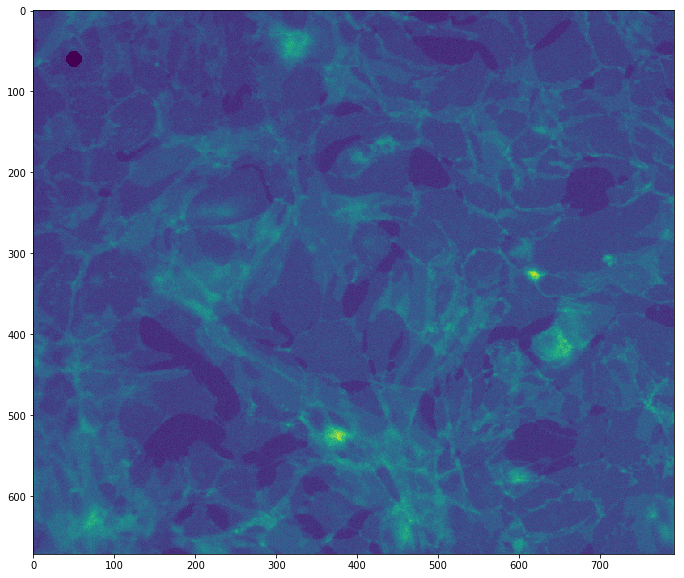

In [86]:
plt.figure(figsize=(20,10))
plt.imshow(image)

In [98]:
ll = [(int(xs[i]), int(ys[i]), good_one_r1[i]) for i in range(len(xs))]
f = open("./temp.txt", "w")
for l in ll:
    f.write(str(l[0]) + ", " + str(l[1]) + ", " + str(l[2]) + "\n")
f.close()

In [2]:
import imagej

In [ ]:
ij = imagej.init('/Applications/Fiji.app')
ij.getVersion()

Added 415 JARs to the Java classpath.
